DESCRIPTION

# Identify the level of income qualification needed for the families in Latin America.

**Problem Statement Scenario:**
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

**Following actions should be performed:**

- Identify the output variable.

- Understand the type of data.

- Check if there are any biases in your dataset.

- Check whether all members of the house have the same poverty level.

- Check if there is a house without a family head.

- Set poverty level of the members and the head of the house within a family.

- Count how many null values are existing in columns.

- Remove null value rows of the target variable.

- Predict the accuracy using random forest classifier.

- Check the accuracy using random forest with cross validation.


Project done by :- [Siddhant Tondare](https://www.linkedin.com/in/siddhant-tondare-14285822a/)

[GitHub](https://github.com/Siddhant-Tondare/Sid_Portfolio)

In [79]:
# importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [80]:
# accesing the data
df_train = pd.read_csv('/content/drive/MyDrive/Datasets and notebooks/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Datasets and notebooks/test.csv')

In [81]:
# understand the data
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [82]:
# identifying the output variable 
df_train['Target'].unique()

array([4, 2, 3, 1])

In [83]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [84]:
# understand the type of data
df_train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


So We have mixed data types. Specified as below:

- float64 : 8 variables
- int64 : 130 vriables
- object :5 variables


[]

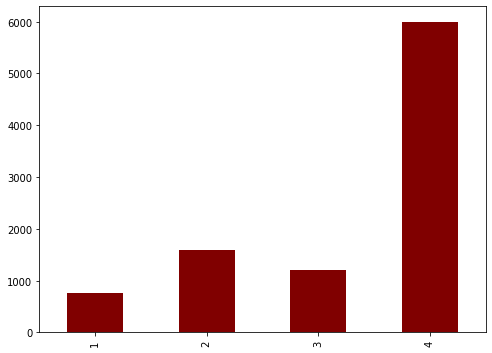

In [86]:
# Lets check is there any Biases in Dataset 
plt.figure(figsize =( 8 , 6))
df_train['Target'].value_counts().sort_index().plot.bar(linewidth = 2 , color = 'maroon')
plt.plot()

As per data dictionary

1 = extreme poverty 

2 = moderate poverty 

3 = vulnerable households 

4 = non vulnerable households


- extreme poverty is the smallest count in the train dataset  and non vulnerable households is largest Hence the Dataset is biased

In [87]:
# Lets Explore each different types of datasets
df_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


## Let's Check if there is a house without a family head.

In [88]:
households_head = df_train.groupby('idhogar')['parentesco1'].sum()

households_no_head = df_train.loc[df_train['idhogar'].isin (households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))



There are 15 households without a head.


Below is Data dictionary for above object variables

- ID = Unique ID
- idhogar, Household level identifier
- dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

- edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

- edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

# Data Cleaning

In [89]:
# lets drop unwanted features.
df_train.drop(['Id' , 'idhogar'] , axis = 1,inplace = True)

In [90]:
df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [91]:
# here are some object variables are present lets convert it to numerical data .
def map(i):
  if i == 'yes':
    return(float(1))
  elif i == 'no':
    return(float(0))
  else:
    return(float(i))

In [92]:
# lets apply on data 
df_train['dependency']= df_train['dependency'].apply(map)

In [93]:
# so lets apply same on other two remaining columns
df_train['edjefe']= df_train['edjefe'].apply(map)
df_train['edjefa']= df_train['edjefa'].apply(map)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 141 entries, v2a1 to Target
dtypes: float64(11), int64(130)
memory usage: 10.3 MB


In [95]:
# Lets check whether there are any null values present in data.
print(df_train.select_dtypes(float).isna().sum())
print('shape of data =', df_train.shape)

v2a1               6860
v18q1              7342
rez_esc            7928
dependency            0
edjefe                0
edjefa                0
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64
shape of data = (9557, 141)


In [96]:
print(df_train.select_dtypes(object).isna().sum())
print('shape of data =', df_train.shape)

Series([], dtype: float64)
shape of data = (9557, 141)


In [97]:
# No null values in int type of data.

print(df_train.select_dtypes(int).isna().sum().value_counts())
print('shape of data =', df_train.shape)

0    130
dtype: int64
shape of data = (9557, 141)


In [98]:
# no null value in Target variable. 

df_train['Target'].isna().sum()

0

**Let's fix the column with null values
According to the documentation for these columns:** 

v2a1 (total nulls: 6860) : Monthly rent payment

v18q1 (total nulls: 7342) : number of tablets household owns

rez_esc (total nulls: 7928) : Years behind in school

meaneduc (total nulls: 5) : average years of education for adults (18+)

SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

Lets look at v2a1 (total nulls: 6860) : Monthly rent payment

why the null values, Lets look at few rows with nulls in v2a1:

- Columns related to Monthly rent payment

1. tipovivi1, =1 own and fully paid house
2. tipovivi2, "=1 own, paying in installments"
3. tipovivi3, =1 rented
4. tipovivi4, =1 precarious
5. tipovivi5, "=1 other(assigned, borrowed)"

In [99]:
data = df_train[df_train['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


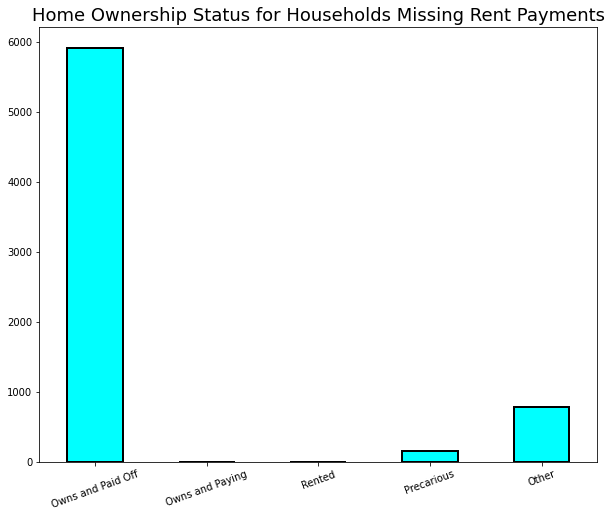

In [100]:
# Variables indicating home ownership
own_variables = [x for x in df_train if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
df_train.loc[df_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8), color = 'cyan', edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [101]:
#Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.
#Lets add 0 for all the null values.
for df in [df_train, df_test]:
    df['v2a1'].fillna(value=0, inplace=True)

df_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

Lets look at v18q1 (total nulls: 7342) : number of tablets household owns
why the null values, Lets look at few rows with nulls in v18q1
Columns related to number of tablets household owns
v18q, owns a tablet


Since this is a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.

In [102]:
# Heads of household
heads = df_train.loc[df_train['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

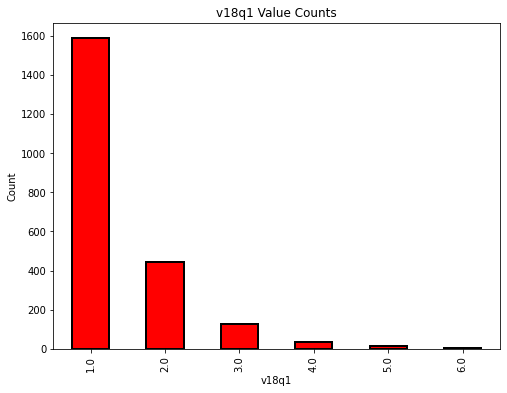

In [103]:
plt.figure(figsize = (8, 6))
col='v18q1'
df_train[col].value_counts().sort_index().plot.bar(color = 'red',
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show();

In [104]:
for df in [df_train, df_test]:
    df['v18q1'].fillna(value=0, inplace=True)

df_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [105]:
# lets do same with 'rez_esc' variable
for df in [df_train, df_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
df_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [106]:
for df in [df_train, df_test]:
    df['meaneduc'].fillna(value=0, inplace=True)
df_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [107]:
for df in [df_train, df_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
df_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [108]:
# lets deleate unwated/ biased columns
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']       
for df in [df_train, df_test]:
    df.drop(columns = cols , inplace=True)

    print (df_train.shape)


(9557, 132)
(9557, 132)


In [109]:
cols=['tamhog', 'hogar_total', 'r4t3','area2','male']
for df in [df_train, df_test]:
    df.drop(columns = cols , inplace=True)

    print (df_train.shape)

(9557, 127)
(9557, 127)


In [110]:
print ('Shape of train = ',df_train.shape)
print ('Shape of test = ',df_test.shape)

Shape of train =  (9557, 127)
Shape of test =  (23856, 128)


Here two column is remaining to drop from test data

In [111]:
df_test.drop(['Id','idhogar'],axis=1,inplace=True)


df_test['dependency']=df_test['dependency'].apply(map)
df_test['edjefe']=df_test['edjefe'].apply(map)
df_test['edjefa']=df_test['edjefa'].apply(map)

In [112]:
print ('Shape of train = ',df_train.shape)
print ('Shape of test = ',df_test.shape)

Shape of train =  (9557, 127)
Shape of test =  (23856, 126)


Now its Correct one variable is less in test data because of Target variable is not present in test data.

So we are ready with both train and test data

## Set poverty level of the members and the head of the house within a family.

In [113]:
Poverty_level = df_train[df_train['v2a1'] !=0]

In [114]:
Poverty_level.shape

(2668, 127)

In [115]:
poverty_level = Poverty_level.groupby('area1') ['v2a1'].apply(np.median)
poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

- For rural area level if people paying rent less than 8000 is under poverty level.
- For Urban area level if people paying rent less than 140000 is under poverty level.

In [116]:
def poverty(x):
  if x<8000:
    return('Below Poverty Level')
  elif x> 140000:
    return('Above Poverty Level')
  elif x<140000:
    return ('Below Povert Level: Urban ; Above Poverty Level : Rural ')

In [117]:
m = Poverty_level['v2a1'].apply(poverty)
m.shape

(2668,)

In [118]:
pd.crosstab(m,Poverty_level['area1'])

area1,0,1
v2a1,,
Above Poverty Level,139,1103
Below Povert Level: Urban ; Above Poverty Level : Rural,306,1081


- **There are total 1242 people above poverty level independent of area whether rural or Urban**
- **Remaining 1111 people level depends on their area**

**Rural :**

Above poverty level= 445

**Urban :**

Above poverty level =1103

Below poverty level=1081

# Model Building
## let's predict the accuracy usins Random Forest Classifier

In [119]:
# dividing the data to x and y features 
x = df_train.drop('Target',axis = 1) # feature without target
y = df_train.Target   # feature with target
print (x.shape)
print (y.shape)

(9557, 126)
(9557,)


In [120]:
# importing models from sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  , f1_score , classification_report

In [121]:
# lets divide the data in training and testing set

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.25 , random_state = 4)
rfc = RandomForestClassifier()

In [122]:
# fit the model
model = rfc.fit(x_train, y_train)

In [123]:
# prediction 
y_pred = rfc.predict(x_test)

In [124]:
# print the prediction 

print ('Accuracy = ', accuracy_score(y_test,y_pred))
print ( confusion_matrix(y_test,y_pred))
print ( classification_report(y_test,y_pred))

Accuracy =  0.9326359832635983
[[ 136    9    1   22]
 [   4  343    5   59]
 [   0    8  230   52]
 [   0    0    1 1520]]
              precision    recall  f1-score   support

           1       0.97      0.81      0.88       168
           2       0.95      0.83      0.89       411
           3       0.97      0.79      0.87       290
           4       0.92      1.00      0.96      1521

    accuracy                           0.93      2390
   macro avg       0.95      0.86      0.90      2390
weighted avg       0.94      0.93      0.93      2390



In [125]:
# prediction on test data
y_pred_testdata = rfc.predict(df_test)
y_pred_testdata

array([4, 4, 4, ..., 2, 4, 4])

In [126]:
print('Model Score of train data : {}'.format(model.score(x_train,y_train)))
print('Model Score of test data : {}'.format(model.score(x_test,y_test)))

Model Score of train data : 1.0
Model Score of test data : 0.9326359832635983


# Let's Check the accuracy using random forest with cross validation. 

In [127]:
from sklearn.model_selection import KFold,cross_val_score

In [128]:
kfold = KFold(n_splits = 5, random_state = 4 , shuffle = True)
rfc = RandomForestClassifier(random_state = 4 , n_jobs = -1)

print (cross_val_score (rfc , x , y ,cv = kfold , scoring ='accuracy'))

results = cross_val_score (rfc , x , y ,cv = kfold ,scoring = 'accuracy')
print (results.mean()*100)

[0.94560669 0.92154812 0.92673993 0.92360021 0.93197279]
92.989354737711


In [129]:
rfc.fit(x,y)
labels = list (x)
feature_importances = pd.DataFrame({'feature': labels, 'importance' : rfc.feature_importances_})
feature_importances = feature_importances[feature_importances.importance>0.015]
print (feature_importances.head())
print (feature_importances.shape)

   feature  importance
0     v2a1    0.018011
2    rooms    0.024247
9     r4h2    0.020789
10    r4h3    0.019988
12    r4m2    0.015689
(22, 2)


In [130]:
y_pred_testdata = rfc.predict(df_test)
y_pred_testdata

array([4, 4, 4, ..., 4, 4, 4])

Text(0.5, 0, 'Importance')

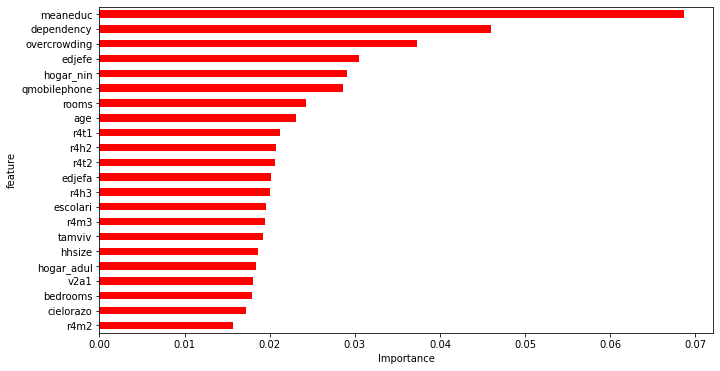

In [131]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'red', False: 'blue'}))
plt.xlabel('Importance')

# Let's Apply Model on only important features and let's see what happens.

In [132]:
feature_importances.head()

,importance,positive
feature,,
r4m2,0.015689,True
cielorazo,0.017227,True
bedrooms,0.017884,True
v2a1,0.018011,True
hogar_adul,0.018335,True


In [133]:
feature_importances.index

Index(['r4m2', 'cielorazo', 'bedrooms', 'v2a1', 'hogar_adul', 'hhsize',
       'tamviv', 'r4m3', 'escolari', 'r4h3', 'edjefa', 'r4t2', 'r4h2', 'r4t1',
       'age', 'rooms', 'qmobilephone', 'hogar_nin', 'edjefe', 'overcrowding',
       'dependency', 'meaneduc'],
      dtype='object', name='feature')

In [134]:
top_features = ['r4m2', 'cielorazo', 'bedrooms', 'v2a1', 'hogar_adul', 'hhsize',
       'tamviv', 'r4m3', 'escolari', 'r4h3', 'edjefa', 'r4t2', 'r4h2', 'r4t1',
       'age', 'rooms', 'qmobilephone', 'hogar_nin', 'edjefe', 'overcrowding',
       'dependency', 'meaneduc']

In [135]:
top_x = x[top_features]

In [136]:
print (top_x.columns)
print (y.head())

Index(['r4m2', 'cielorazo', 'bedrooms', 'v2a1', 'hogar_adul', 'hhsize',
       'tamviv', 'r4m3', 'escolari', 'r4h3', 'edjefa', 'r4t2', 'r4h2', 'r4t1',
       'age', 'rooms', 'qmobilephone', 'hogar_nin', 'edjefe', 'overcrowding',
       'dependency', 'meaneduc'],
      dtype='object')
0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64


In [137]:
x_train,x_test,y_train,y_test=train_test_split( top_x, y,test_size=0.25, random_state=4)

In [138]:
model_ =rfc.fit(x_train,y_train)
y_pred_top =  model_.predict(x_test)

In [139]:
print ('Accuracy = ', accuracy_score(y_test,y_pred_top))
print ( confusion_matrix(y_test,y_pred_top))
print ( classification_report(y_test,y_pred_top))

Accuracy =  0.9184100418410042
[[ 135    7    3   23]
 [   4  334    7   66]
 [   0   21  227   42]
 [   2    7   13 1499]]
              precision    recall  f1-score   support

           1       0.96      0.80      0.87       168
           2       0.91      0.81      0.86       411
           3       0.91      0.78      0.84       290
           4       0.92      0.99      0.95      1521

    accuracy                           0.92      2390
   macro avg       0.92      0.85      0.88      2390
weighted avg       0.92      0.92      0.92      2390



In [140]:
df_test_top = df_test[top_features]
df_test_top.head()

,r4m2,cielorazo,bedrooms,v2a1,hogar_adul,hhsize,tamviv,r4m3,escolari,r4h3,...,r4h2,r4t1,age,rooms,qmobilephone,hogar_nin,edjefe,overcrowding,dependency,meaneduc
0,1,1,2,0.0,2,3,3,1,0,2,...,1,1,4,5,2,1,0.0,1.5,0.5,16.5
1,1,1,2,0.0,2,3,3,1,16,2,...,1,1,41,5,2,1,0.0,1.5,0.5,16.5
2,1,1,2,0.0,2,3,3,1,17,2,...,1,1,41,5,2,1,0.0,1.5,0.5,16.5
3,0,1,1,0.0,1,1,1,0,16,1,...,1,0,59,14,2,0,16.0,1.0,0.0,16.0
4,1,1,2,175000.0,0,1,1,1,11,0,...,0,0,18,4,1,1,0.0,0.5,8.0,0.0


In [141]:
y_pred_testdata_top = rfc.predict(df_test_top)
y_pred_testdata_top

array([4, 4, 4, ..., 2, 2, 2])

In [142]:
print('Model Score of train data : {}'.format(model_.score(x_train,y_train)))
print('Model Score of test data : {}'.format(model_.score(x_test,y_test)))

Model Score of train data : 0.9994418864238873
Model Score of test data : 0.9184100418410042


### Conclusion :- Here we can see although we use important features but accuracy of our model still slightly decreases. 

so its important to train our model on all required features for good accuracy. 